In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('US_Stock_Data.csv')
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   object 
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   object 
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   object 
 15  Nasdaq_100_Price   1013 non-null   object 
 16  Nasdaq_100_Vol.    1012 

In [5]:
data.isna().mean()

Unnamed: 0           0.000000
Date                 0.000000
Natural_Gas_Price    0.000000
Natural_Gas_Vol.     0.003949
Crude_oil_Price      0.000000
Crude_oil_Vol.       0.022705
Copper_Price         0.000000
Copper_Vol.          0.036525
Bitcoin_Price        0.000000
Bitcoin_Vol.         0.000000
Platinum_Price       0.000000
Platinum_Vol.        0.372162
Ethereum_Price       0.000000
Ethereum_Vol.        0.000000
S&P_500_Price        0.000000
Nasdaq_100_Price     0.000000
Nasdaq_100_Vol.      0.000987
Apple_Price          0.000000
Apple_Vol.           0.000000
Tesla_Price          0.000000
Tesla_Vol.           0.000000
Microsoft_Price      0.000000
Microsoft_Vol.       0.000000
Silver_Price         0.000000
Silver_Vol.          0.045410
Google_Price         0.000000
Google_Vol.          0.000000
Nvidia_Price         0.000000
Nvidia_Vol.          0.000000
Berkshire_Price      0.000000
Berkshire_Vol.       0.000000
Netflix_Price        0.000000
Netflix_Vol.         0.000000
Amazon_Pri

In [6]:
data_pre = data.drop(columns=['Platinum_Vol.']).ffill().bfill()
# bfill() : missing value that cannot be solved by fillna()
data_pre = pd.concat([data_pre.iloc[:, :11], data['Platinum_Vol.'].fillna(0), data_pre.iloc[:, 11:]], axis=1)
# Platinum_Vol's missing value = 0

In [7]:
data_pre.isna().sum()

Unnamed: 0           0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

In [8]:
## Finally, Transforms the data format as appropriate.
data_pre['Date'] = data_pre['Date'].str.replace('/', '-')
data_pre['Date'] = pd.to_datetime(data_pre['Date'], format='%d-%m-%Y')
data_pre.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2024-02-02,2.079,161340.0,72.28,577940.0,3.8215,38000.0,"43,194.70",42650,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",260920.0
1,1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,38000.0,"43,081.40",47690,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2,2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,38000.0,"42,580.50",56480,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
3,3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,38000.0,"42,946.20",55130,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
4,4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,38000.0,"43,299.80",45230,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [9]:
for col in data_pre.columns:
    if data_pre[col].dtype == 'object':
        data_pre[col] = data_pre[col].str.replace(',','').astype(float)   

In [10]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1013 non-null   int64         
 1   Date               1013 non-null   datetime64[ns]
 2   Natural_Gas_Price  1013 non-null   float64       
 3   Natural_Gas_Vol.   1013 non-null   float64       
 4   Crude_oil_Price    1013 non-null   float64       
 5   Crude_oil_Vol.     1013 non-null   float64       
 6   Copper_Price       1013 non-null   float64       
 7   Copper_Vol.        1013 non-null   float64       
 8   Bitcoin_Price      1013 non-null   float64       
 9   Bitcoin_Vol.       1013 non-null   int64         
 10  Platinum_Price     1013 non-null   float64       
 11  Platinum_Vol.      1013 non-null   float64       
 12  Ethereum_Price     1013 non-null   float64       
 13  Ethereum_Vol.      1013 non-null   int64         
 14  S&P_500_

In [11]:
## Pivot table _ price
col_price=[]
for col in data_pre.columns.tolist():
    if 'Price' in col:
        col_price.append(col)

date = data_pre['Date']

In [12]:
# pivot_table : Price (day)

pivot_price_1 = pd.pivot_table(data_pre, index='Date', values=col_price, aggfunc='mean')
pivot_price_1

,Amazon_Price,Apple_Price,Berkshire_Price,Bitcoin_Price,Copper_Price,Crude_oil_Price,Ethereum_Price,Gold_Price,Google_Price,Meta_Price,Microsoft_Price,Nasdaq_100_Price,Natural_Gas_Price,Netflix_Price,Nvidia_Price,Platinum_Price,S&P_500_Price,Silver_Price,Tesla_Price
Date,,,,,,,,,,,,,,,,,,,
2020-01-02,94.90,75.09,342261.0,6967.0,2.8250,61.18,127.19,1528.1,68.43,209.78,160.62,8872.22,2.122,329.81,59.98,986.90,3257.85,18.046,28.68
2020-01-03,93.75,74.36,339155.0,7343.1,2.7870,63.05,134.27,1552.4,68.08,208.67,158.62,8793.90,2.130,325.90,59.02,988.55,3234.85,18.151,29.53
2020-01-06,95.14,74.95,340210.0,7759.1,2.7900,63.27,144.08,1568.8,69.89,212.60,159.03,8848.51,2.135,335.83,59.27,969.35,3246.28,18.179,30.10
2020-01-07,95.34,74.60,338901.0,8155.7,2.7935,62.70,143.04,1574.3,69.76,213.06,157.58,8846.45,2.162,330.75,59.98,977.75,3237.18,18.393,31.27
2020-01-08,94.60,75.80,339188.0,8059.6,2.8120,59.61,140.81,1560.2,70.25,215.22,160.09,8912.37,2.141,339.26,60.09,961.00,3253.05,18.167,32.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,161.26,191.73,578800.0,43299.8,3.8790,76.78,2317.79,2034.9,153.51,401.02,409.72,17596.27,2.490,575.79,624.65,938.30,4927.93,23.134,190.93
2024-01-30,159.00,188.04,584680.0,42946.2,3.9110,77.82,2343.11,2050.9,151.46,400.06,408.59,17476.71,2.077,562.85,627.74,931.70,4924.97,23.225,191.59
2024-01-31,155.20,184.40,578020.0,42580.5,3.9060,75.85,2283.14,2067.4,140.10,390.14,397.58,17137.24,2.100,564.11,615.27,932.60,4848.87,23.169,187.29


In [13]:
#pivot_table : Price (day)

for col in col_price:
    pivot_price_2 = pd.pivot_table(data_pre, index='Date',values=col,aggfunc='mean')
    print(pivot_price_2)
    print('-'*30)

            Natural_Gas_Price
Date                         
2020-01-02              2.122
2020-01-03              2.130
2020-01-06              2.135
2020-01-07              2.162
2020-01-08              2.141
...                       ...
2024-01-29              2.490
2024-01-30              2.077
2024-01-31              2.100
2024-02-01              2.050
2024-02-02              2.079

[1013 rows x 1 columns]
------------------------------
            Crude_oil_Price
Date                       
2020-01-02            61.18
2020-01-03            63.05
2020-01-06            63.27
2020-01-07            62.70
2020-01-08            59.61
...                     ...
2024-01-29            76.78
2024-01-30            77.82
2024-01-31            75.85
2024-02-01            73.82
2024-02-02            72.28

[1013 rows x 1 columns]
------------------------------
            Copper_Price
Date                    
2020-01-02        2.8250
2020-01-03        2.7870
2020-01-06        2.7900
2020-01-0

In [14]:
#pivot_table : Price (month_average)
data_pre['Month'] = pd.to_datetime(data_pre['Date']).dt.month
pivot_table_month_1 = pd.pivot_table(data_pre,index='Month', values=col_price, aggfunc='mean')
pivot_table_month_1

,Amazon_Price,Apple_Price,Berkshire_Price,Bitcoin_Price,Copper_Price,Crude_oil_Price,Ethereum_Price,Gold_Price,Google_Price,Meta_Price,Microsoft_Price,Nasdaq_100_Price,Natural_Gas_Price,Netflix_Price,Nvidia_Price,Platinum_Price,S&P_500_Price,Silver_Price,Tesla_Price
Month,,,,,,,,,,,,,,,,,,,
1,130.540606,140.632828,440636.242424,29216.026263,3.736192,69.061212,1635.424949,1837.180808,107.006869,262.456061,265.063939,13130.820303,2.968697,436.058485,240.846465,1012.847980,4082.134040,22.656929,195.162828
2,130.104737,133.526579,414219.368421,29918.321053,3.744395,69.440263,1615.740526,1785.711842,102.928158,224.870395,248.034605,12489.659605,2.884171,420.856711,181.208553,1037.671053,3940.513421,22.585671,200.526974
3,124.802527,127.613297,410404.967033,32498.819780,3.803951,69.028791,1630.171429,1800.808791,99.103297,211.107692,238.110110,11873.097473,2.959099,387.426813,173.534176,996.529670,3742.544286,22.100264,189.030220
4,133.945679,131.732963,419043.555556,33743.260494,3.780963,64.056790,1866.031235,1847.455556,101.829506,228.042469,249.103704,12277.083333,3.324012,394.763210,174.776790,1000.827160,3840.740494,22.625062,196.392099
5,126.219136,132.991481,418870.061728,28989.614815,3.771679,69.071358,1890.843333,1860.469136,104.159012,243.930617,255.084691,12217.861235,3.799753,364.784198,183.568272,1018.819136,3835.731481,22.721654,174.043333
6,134.926905,134.602262,409094.357143,24319.664286,3.715601,72.752024,1434.833571,1840.346429,106.444048,255.738452,260.881190,12657.736667,3.702655,390.393690,212.526071,970.862500,3889.442738,22.420560,186.286667
7,145.788000,145.186250,411147.887500,23799.922500,3.615325,71.409625,1393.702125,1840.387500,109.578500,266.654250,272.427750,13260.772500,3.784700,420.690000,226.739375,948.664375,3990.591000,22.545600,208.864000
8,149.815393,154.230449,434702.797753,26974.960674,3.664567,71.396404,1752.108989,1872.894382,116.213708,274.206517,279.691348,13738.786854,4.500787,418.923146,242.305281,949.432022,4127.915730,23.506416,225.257191
9,146.932375,148.264125,427430.012500,25495.283750,3.623325,71.138000,1681.514625,1832.518750,113.506625,270.006750,269.824625,13390.644875,4.470438,431.275375,230.500875,919.140000,4016.437875,22.831650,234.243000


In [15]:
#pivot_table : Price (month_average)

for col in col_price:
    pivot_table_month_2 = pd.pivot_table(data_pre,index='Month', values=col, aggfunc='mean')
    print(pivot_table_month_2)
    print('-'*20)

       Natural_Gas_Price
Month                   
1               2.968697
2               2.884171
3               2.959099
4               3.324012
5               3.799753
6               3.702655
7               3.784700
8               4.500787
9               4.470438
10              4.377267
11              4.399815
12              3.657400
--------------------
       Crude_oil_Price
Month                 
1            69.061212
2            69.440263
3            69.028791
4            64.056790
5            69.071358
6            72.752024
7            71.409625
8            71.396404
9            71.138000
10           73.067442
11           71.135802
12           66.670471
--------------------
       Copper_Price
Month              
1          3.736192
2          3.744395
3          3.803951
4          3.780963
5          3.771679
6          3.715601
7          3.615325
8          3.664567
9          3.623325
10         3.624052
11         3.743531
12         3.890206
------

In [16]:
#pivot_table : Price (year_average)
data_pre['Year'] = pd.to_datetime(data_pre['Date']).dt.year
pivot_table_year_1 = pd.pivot_table(data_pre,index='Year', values=col_price, aggfunc='mean')
pivot_table_year_1

,Amazon_Price,Apple_Price,Berkshire_Price,Bitcoin_Price,Copper_Price,Crude_oil_Price,Ethereum_Price,Gold_Price,Google_Price,Meta_Price,Microsoft_Price,Nasdaq_100_Price,Natural_Gas_Price,Netflix_Price,Nvidia_Price,Platinum_Price,S&P_500_Price,Silver_Price,Tesla_Price
Year,,,,,,,,,,,,,,,,,,,
2020,133.821486,95.263815,307684.329317,11139.834137,2.802235,39.344699,307.995462,1778.864257,73.886265,234.216546,192.873293,10270.288675,2.128671,446.346707,98.739679,896.142972,3216.771124,20.687550,96.405984
2021,167.145610,141.010081,411017.650407,47612.099187,4.244705,68.179268,2796.126016,1798.497154,124.301870,321.144756,276.105732,14488.889350,3.727346,558.124959,195.124228,1091.008537,4274.427358,25.148760,259.890935
2022,126.012980,154.892571,458454.734694,28185.517551,4.001306,94.255878,1988.333796,1805.352653,114.667837,179.712082,268.841265,12748.819388,6.527478,284.831224,185.626449,960.553673,4098.832571,21.813502,262.945918
2023,121.372760,172.548920,509591.760000,28853.267200,3.860772,77.611080,1792.820320,1953.772000,118.794720,261.424280,313.950960,14192.913920,2.671088,390.247880,365.692560,971.515200,4283.745800,23.526124,217.475240
2024,154.652609,187.605217,563110.608696,43053.652174,3.818457,73.790435,2365.913478,2041.695652,143.661739,379.215217,391.019565,17022.116957,2.658435,510.315217,569.839130,929.365217,4815.617826,22.959217,213.717826


In [17]:
#pivot_table : Price (year_average)

for col in col_price:
    pivot_table_year_2 = pd.pivot_table(data_pre,index='Year', values=col, aggfunc='mean')
    print(pivot_table_year_2)
    print('-'*20)

      Natural_Gas_Price
Year                   
2020           2.128671
2021           3.727346
2022           6.527478
2023           2.671088
2024           2.658435
--------------------
      Crude_oil_Price
Year                 
2020        39.344699
2021        68.179268
2022        94.255878
2023        77.611080
2024        73.790435
--------------------
      Copper_Price
Year              
2020      2.802235
2021      4.244705
2022      4.001306
2023      3.860772
2024      3.818457
--------------------
      Bitcoin_Price
Year               
2020   11139.834137
2021   47612.099187
2022   28185.517551
2023   28853.267200
2024   43053.652174
--------------------
      Platinum_Price
Year                
2020      896.142972
2021     1091.008537
2022      960.553673
2023      971.515200
2024      929.365217
--------------------
      Ethereum_Price
Year                
2020      307.995462
2021     2796.126016
2022     1988.333796
2023     1792.820320
2024     2365.913478
------

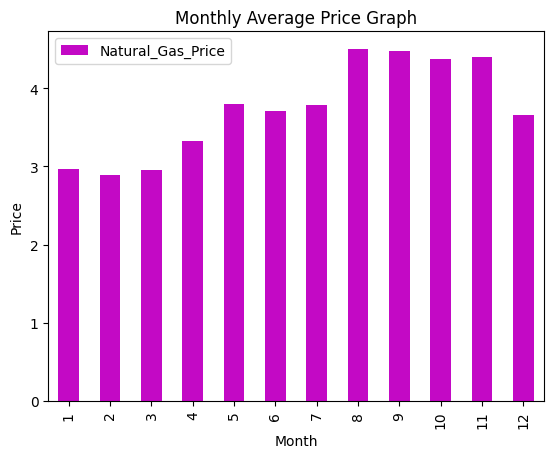

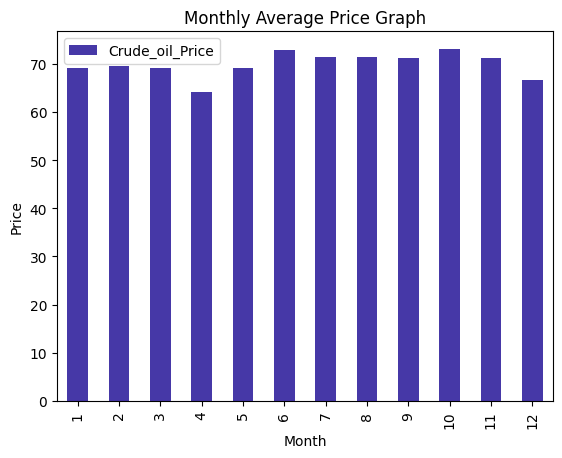

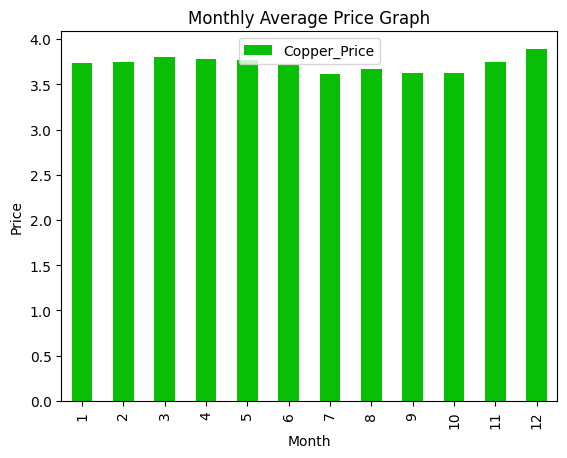

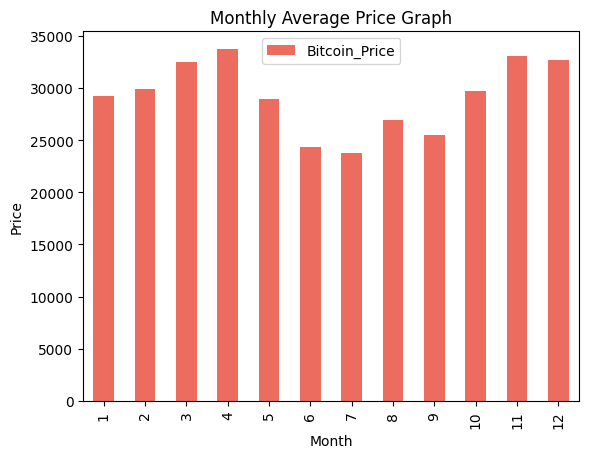

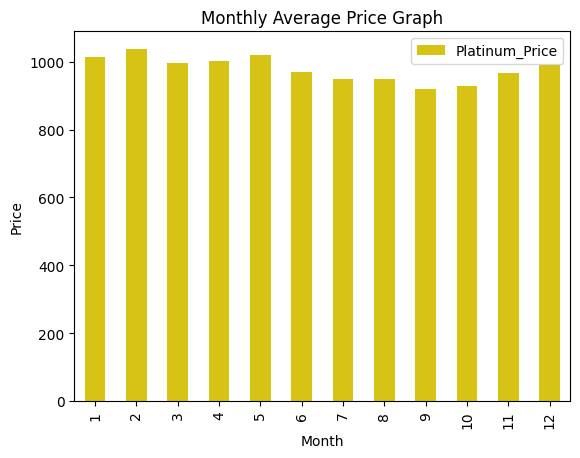

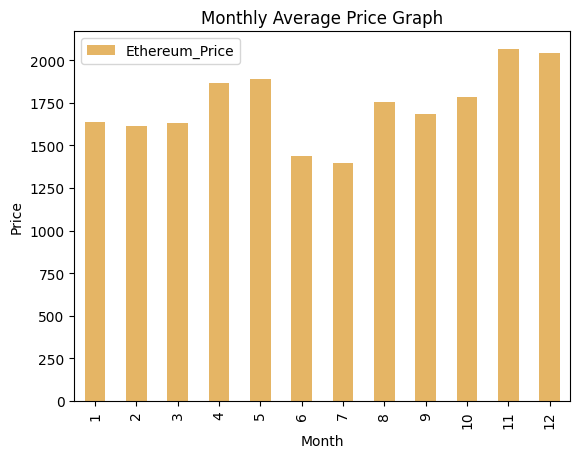

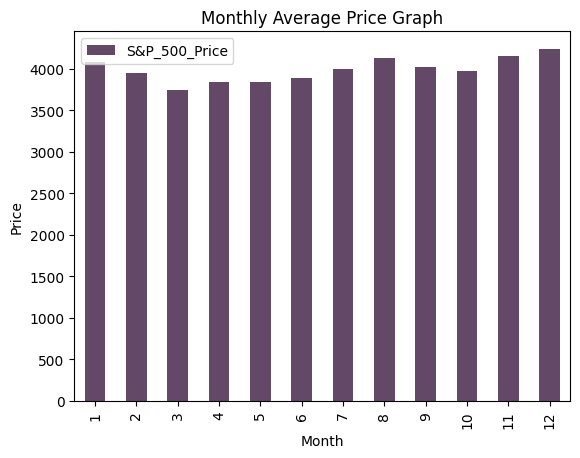

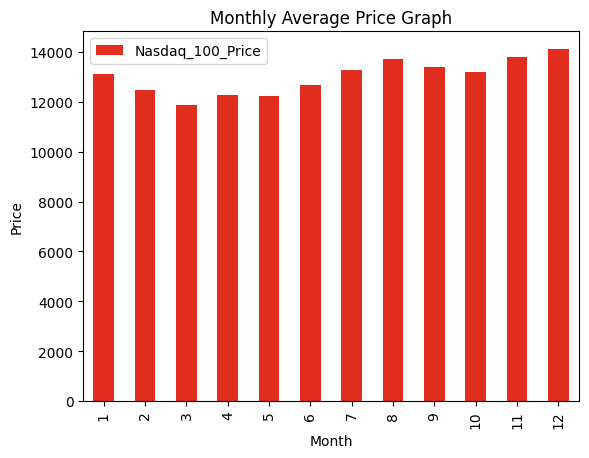

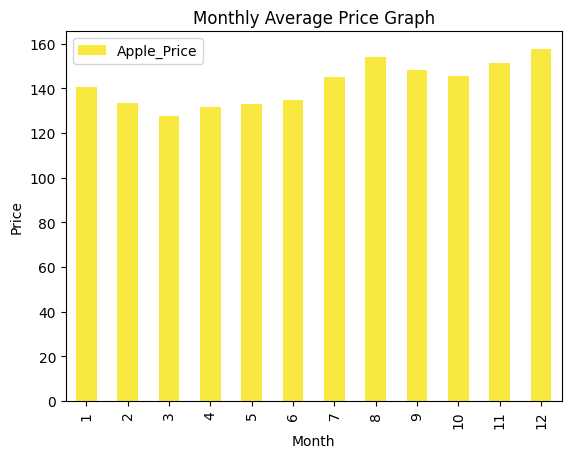

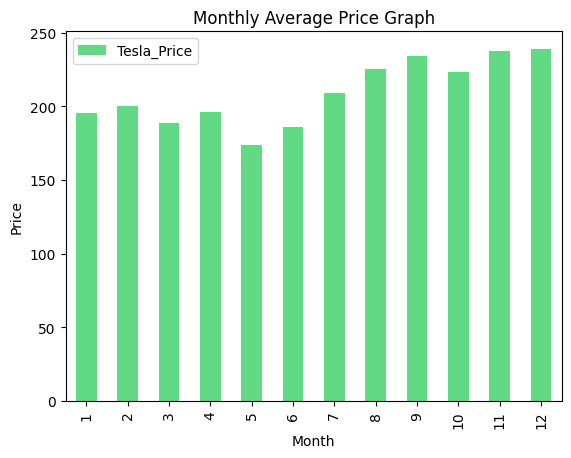

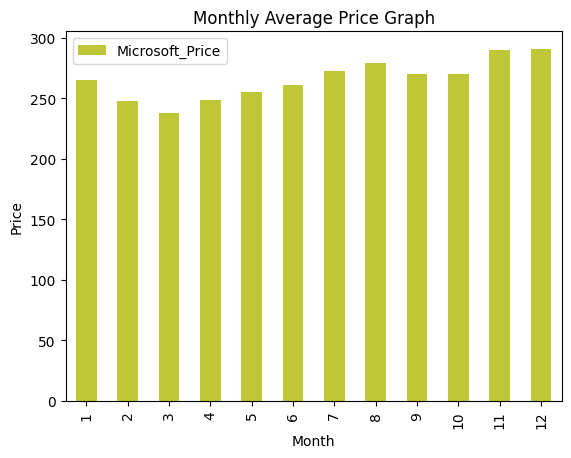

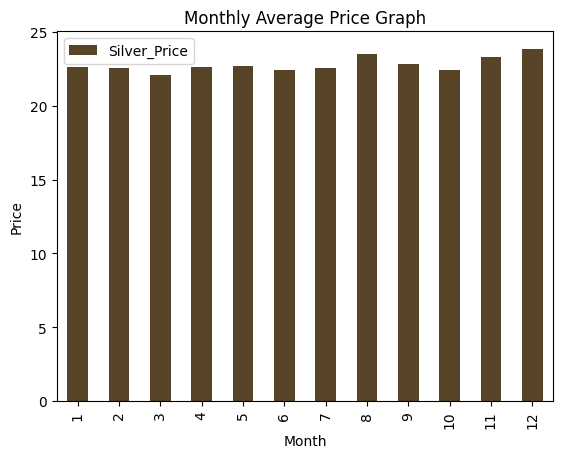

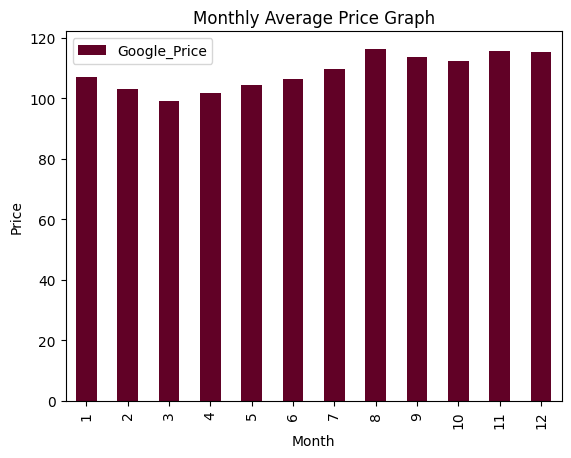

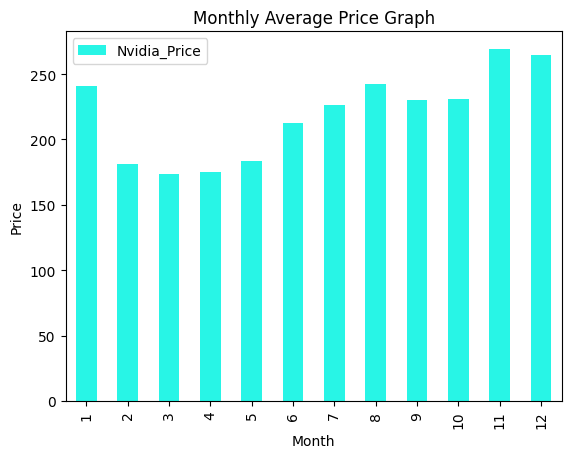

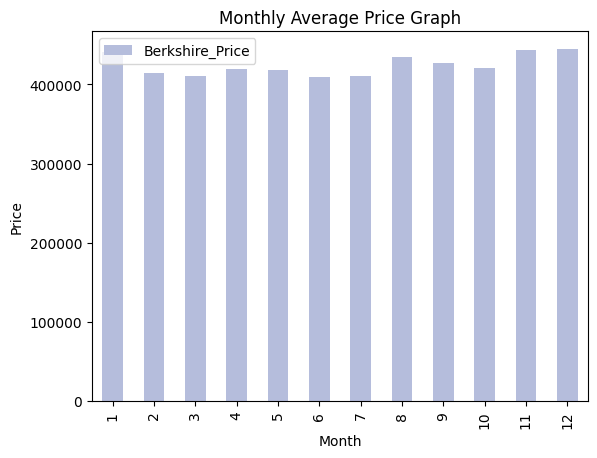

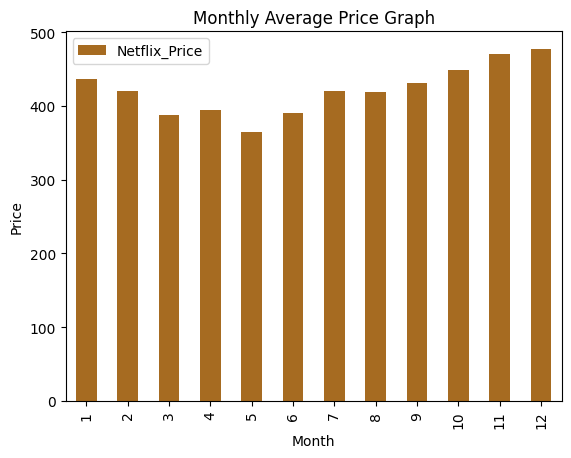

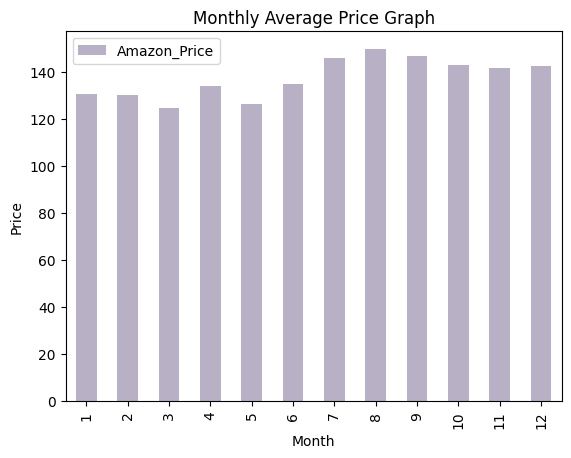

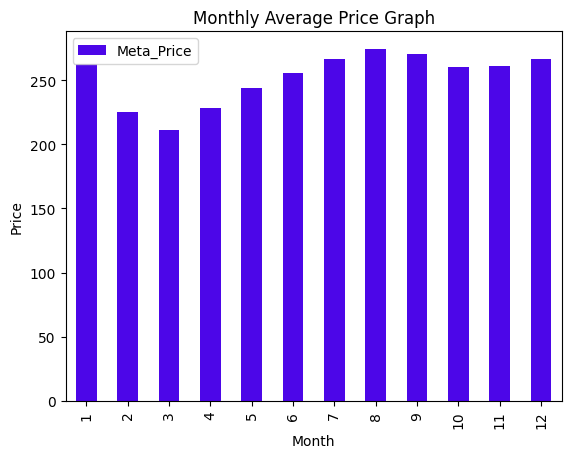

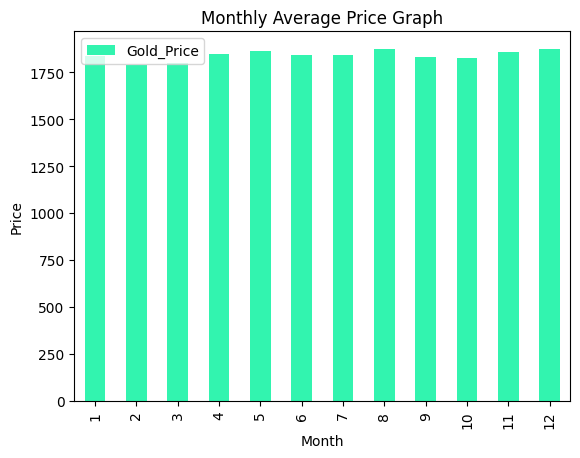

In [18]:
# Monthly Average Price Graph
for col in col_price:
    pivot_table_month_3 = pd.pivot_table(data_pre,index='Month', values=col, aggfunc='mean')
    pivot_table_month_3.plot(kind='bar', color=np.random.rand(3,))
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.title('Monthly Average Price Graph')
    plt.legend()
    plt.show()

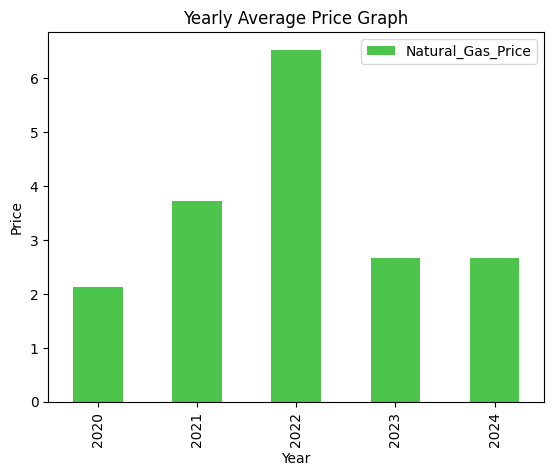

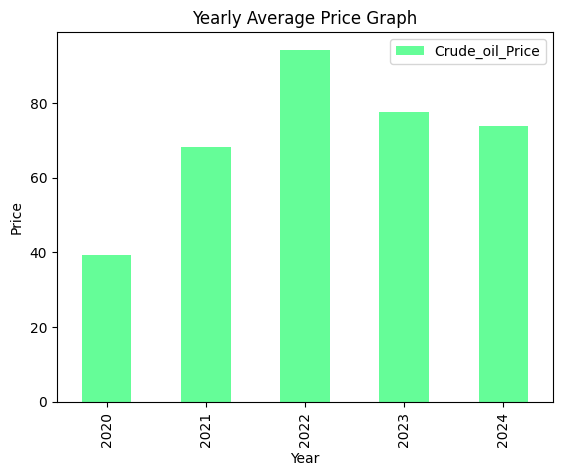

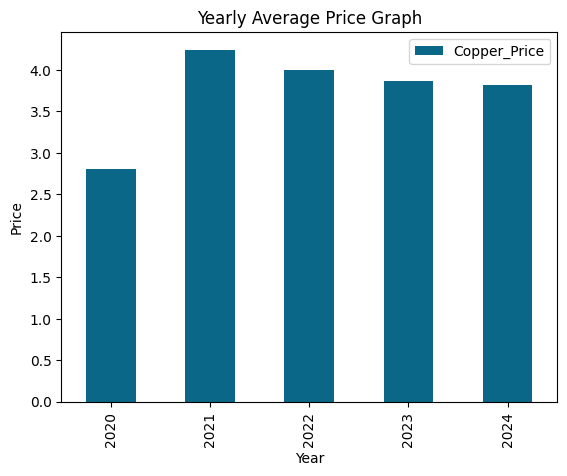

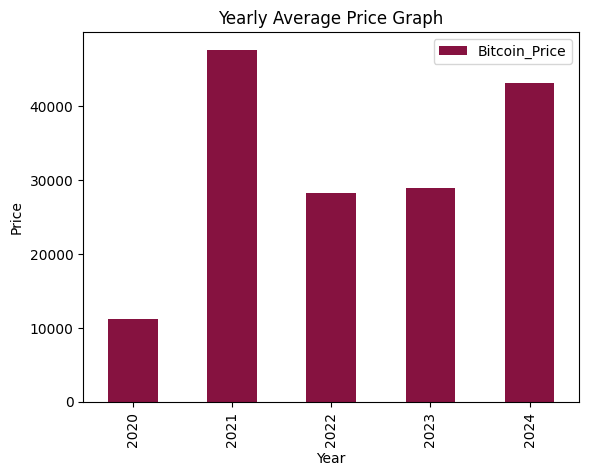

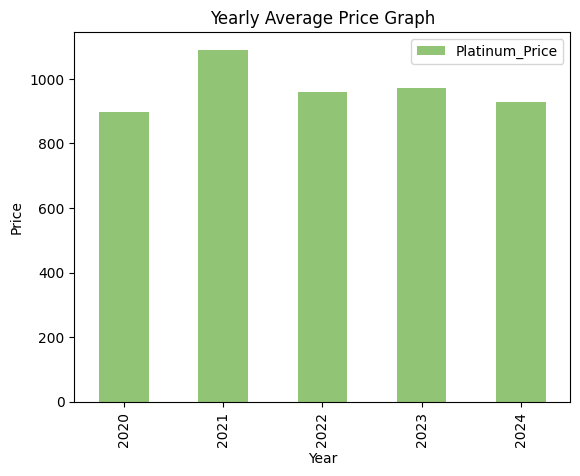

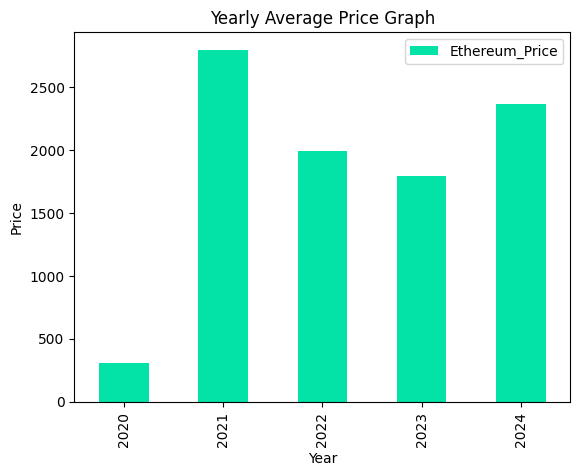

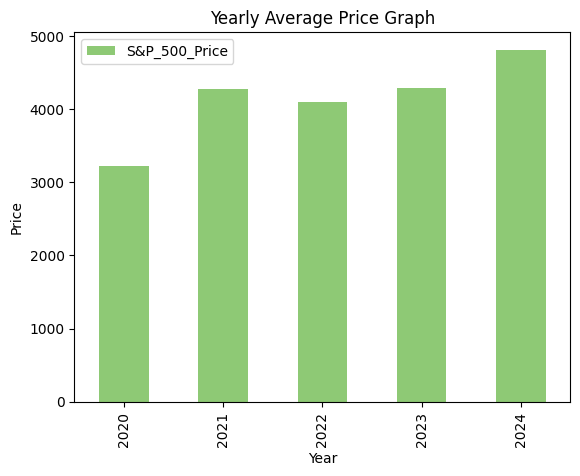

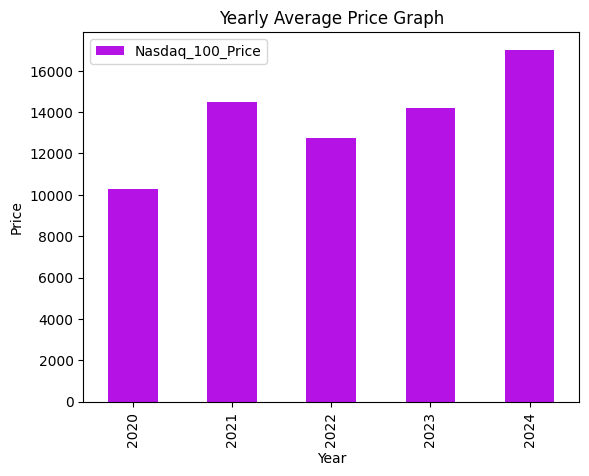

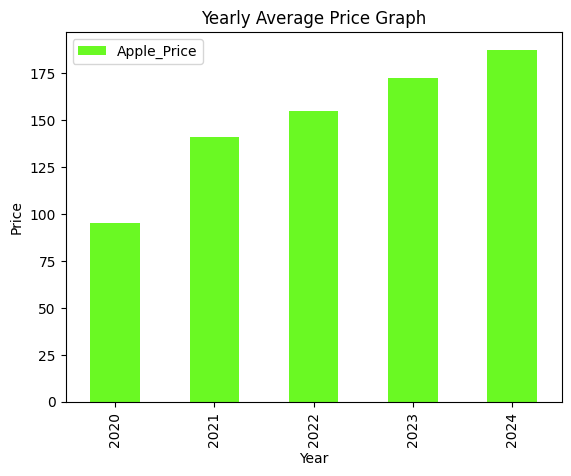

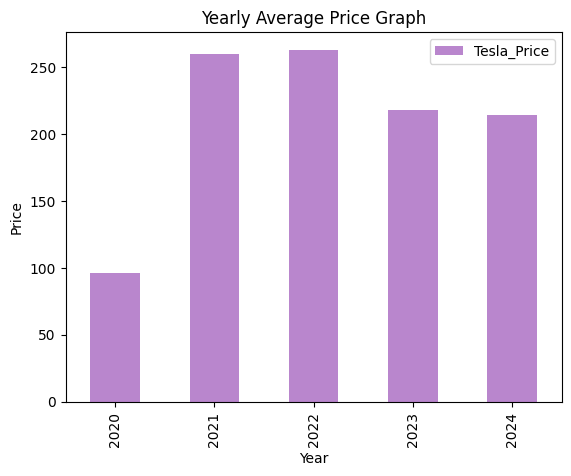

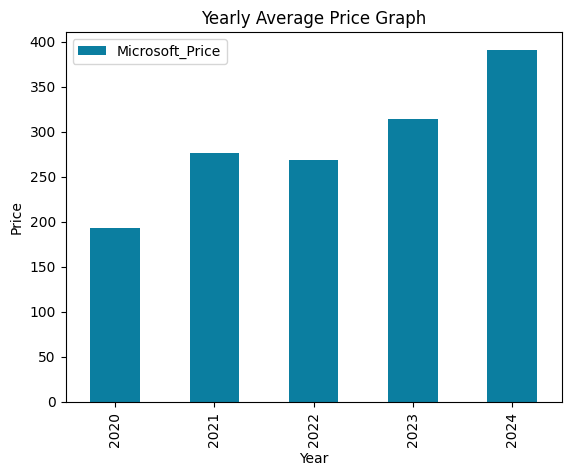

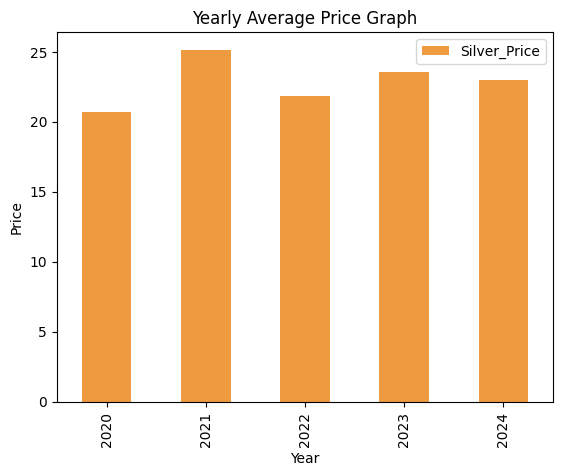

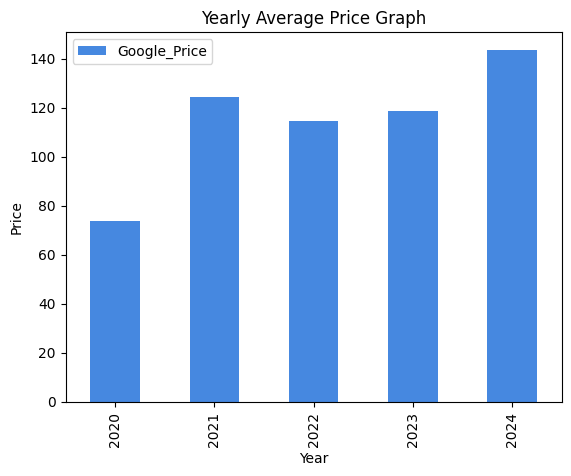

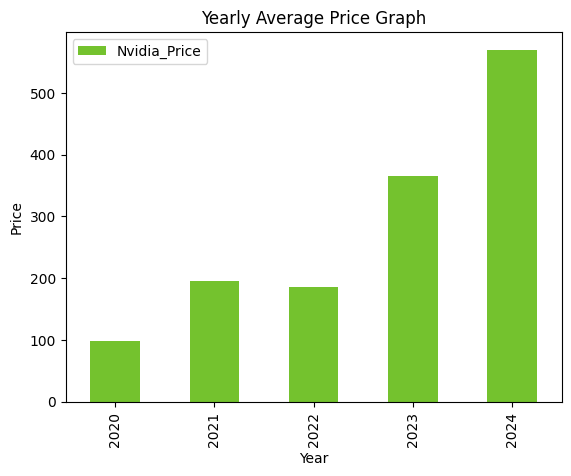

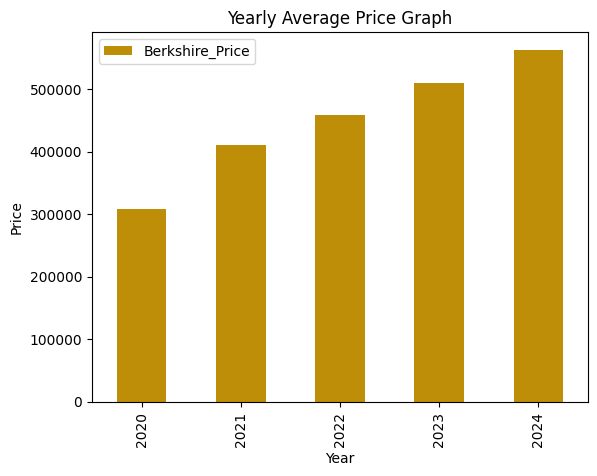

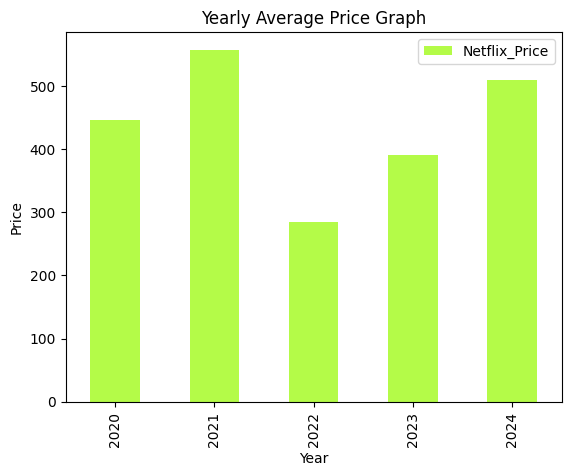

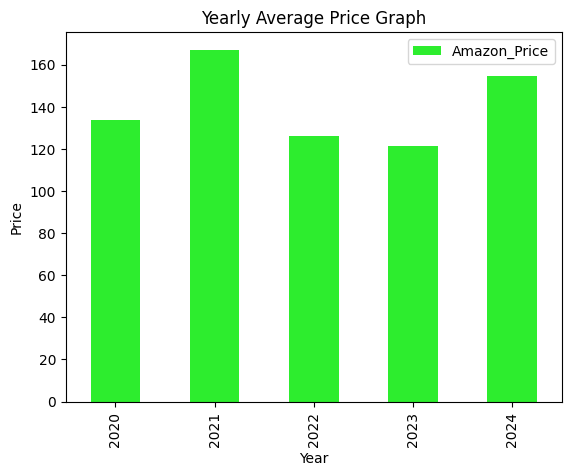

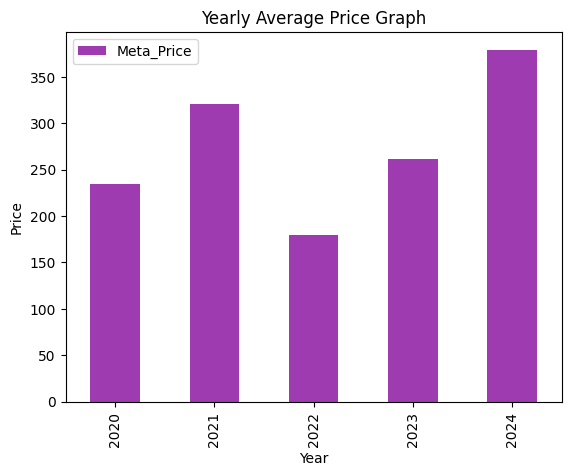

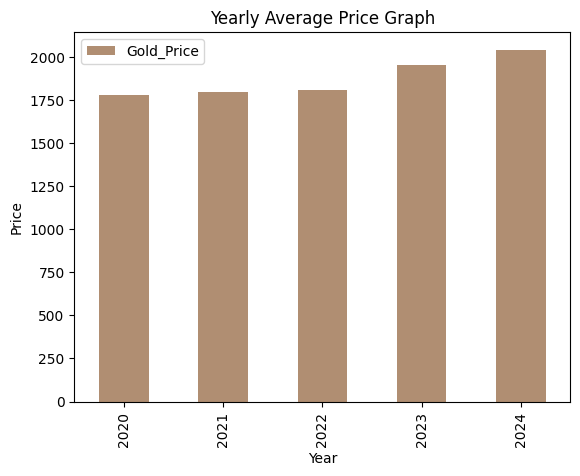

In [19]:
# Yearly Average Price Graph
for col in col_price:
    pivot_table_year_3 = pd.pivot_table(data_pre,index='Year', values=col, aggfunc='mean')
    pivot_table_year_3.plot(kind='bar', color=np.random.rand(3,))
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Yearly Average Price Graph')
    plt.legend()
    plt.show()

In [20]:
col_vol=[]
for col in data_pre.columns.tolist():
    if 'Vol' in col:
        col_vol.append(col)

In [21]:
# pivot_table : vol (day)

pivot_vol_1 = pd.pivot_table(data_pre, index='Date', values=col_vol, aggfunc='mean')
pivot_vol_1

,Amazon_Vol.,Apple_Vol.,Berkshire_Vol.,Bitcoin_Vol.,Copper_Vol.,Crude_oil_Vol.,Ethereum_Vol.,Gold_Vol.,Google_Vol.,Meta_Vol.,Microsoft_Vol.,Nasdaq_100_Vol.,Natural_Gas_Vol.,Netflix_Vol.,Nvidia_Vol.,Platinum_Vol.,Silver_Vol.,Tesla_Vol.
Date,,,,,,,,,,,,,,,,,,
2020-01-02,80720000.0,135650000.0,410.0,632780.0,72460.0,486870.0,11450000.0,270550.0,27290000.0,12090000.0,22630000.0,152650000.0,164570.0,4350000.0,23770000.0,0.0,90110.0,143380000.0
2020-01-03,75330000.0,146540000.0,220.0,936290.0,74750.0,885860.0,15670000.0,436740.0,23410000.0,11200000.0,21120000.0,144750000.0,144670.0,3800000.0,20580000.0,0.0,110020.0,266920000.0
2020-01-06,81310000.0,118580000.0,280.0,786750.0,59570.0,724240.0,14360000.0,558970.0,46790000.0,17070000.0,20830000.0,142380000.0,154680.0,5670000.0,26290000.0,0.0,136410.0,152360000.0
2020-01-07,82680000.0,111510000.0,280.0,1010000.0,59470.0,582650.0,13580000.0,435870.0,34530000.0,15110000.0,21880000.0,151390000.0,163010.0,4740000.0,31920000.0,0.0,111960.0,273140000.0
2020-01-08,70240000.0,132360000.0,190.0,1190000.0,77700.0,1210000.0,13710000.0,813410.0,35330000.0,13490000.0,27760000.0,164570000.0,242560.0,7110000.0,27720000.0,0.0,180480.0,467990000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,42840000.0,46890000.0,13850.0,45230.0,38000.0,331930.0,318840.0,1780.0,27590000.0,17790000.0,23290000.0,238750000.0,3590.0,6880000.0,33900000.0,0.0,330.0,123600000.0
2024-01-30,42290000.0,55270000.0,9750.0,55130.0,38000.0,347240.0,387120.0,214590.0,33060000.0,18610000.0,29340000.0,236210000.0,139750.0,6120000.0,39600000.0,0.0,53370.0,105540000.0
2024-01-31,49690000.0,54830000.0,9720.0,56480.0,38000.0,344490.0,408790.0,238370.0,71370000.0,20010000.0,46780000.0,366450000.0,142860.0,4830000.0,45070000.0,0.0,66910.0,102270000.0


In [22]:
#pivot_table : Vol (day)

for col in col_vol:
    pivot_vol_2 = pd.pivot_table(data_pre, index='Date',values=col,aggfunc='mean')
    print(pivot_vol_2)
    print('-'*30)

            Natural_Gas_Vol.
Date                        
2020-01-02          164570.0
2020-01-03          144670.0
2020-01-06          154680.0
2020-01-07          163010.0
2020-01-08          242560.0
...                      ...
2024-01-29            3590.0
2024-01-30          139750.0
2024-01-31          142860.0
2024-02-01          161340.0
2024-02-02          161340.0

[1013 rows x 1 columns]
------------------------------
            Crude_oil_Vol.
Date                      
2020-01-02        486870.0
2020-01-03        885860.0
2020-01-06        724240.0
2020-01-07        582650.0
2020-01-08       1210000.0
...                    ...
2024-01-29        331930.0
2024-01-30        347240.0
2024-01-31        344490.0
2024-02-01        577940.0
2024-02-02        577940.0

[1013 rows x 1 columns]
------------------------------
            Copper_Vol.
Date                   
2020-01-02      72460.0
2020-01-03      74750.0
2020-01-06      59570.0
2020-01-07      59470.0
2020-01-08      

In [23]:
#pivot_table : Vol (month_average)
pivot_table_month_4 = pd.pivot_table(data_pre,index='Month', values=col_vol, aggfunc='mean')
pivot_table_month_4

,Amazon_Vol.,Apple_Vol.,Berkshire_Vol.,Bitcoin_Vol.,Copper_Vol.,Crude_oil_Vol.,Ethereum_Vol.,Gold_Vol.,Google_Vol.,Meta_Vol.,Microsoft_Vol.,Nasdaq_100_Vol.,Natural_Gas_Vol.,Netflix_Vol.,Nvidia_Vol.,Platinum_Vol.,Silver_Vol.,Tesla_Vol.
Month,,,,,,,,,,,,,,,,,,
1,7.047182e+07,9.818556e+07,3410.909091,3.093801e+05,61076.666667,386467.575758,3.836637e+06,204710.909091,3.435162e+07,2.085758e+07,3.284283e+07,2.355575e+08,142952.323232,8.901010e+06,4.179980e+07,5644.747475,54538.585859,1.640136e+08
2,8.407211e+07,1.020437e+08,2145.789474,3.651100e+05,32323.026316,463729.473684,5.817952e+06,210825.131579,4.479197e+07,3.389421e+07,3.518289e+07,2.395968e+08,157020.394737,5.894342e+06,5.187368e+07,1963.289474,79817.763158,1.808879e+08
3,8.581484e+07,1.386631e+08,2646.483516,4.028307e+08,70641.758242,468967.362637,1.764804e+08,239124.835165,4.300681e+07,2.818462e+07,4.190824e+07,2.882086e+08,121130.329670,6.249890e+06,5.086637e+07,7041.978022,54260.659341,1.558907e+08
4,8.258000e+07,9.627296e+07,2576.172840,1.179465e+08,20138.024691,404472.962963,7.693249e+06,135006.049383,3.932222e+07,2.558741e+07,3.365309e+07,2.176904e+08,146450.864198,1.066210e+07,4.501864e+07,7030.370370,55201.604938,1.455004e+08
5,8.165617e+07,9.800469e+07,2905.308642,4.277548e+07,47868.271605,302503.580247,5.396089e+06,189033.703704,3.579395e+07,2.423358e+07,3.018963e+07,2.340836e+08,124460.740741,7.147901e+06,5.369099e+07,1165.555556,48973.086420,1.280964e+08
6,7.114071e+07,9.210976e+07,2688.333333,2.325882e+05,20416.666667,326559.166667,2.975488e+06,163870.476190,3.226738e+07,2.359881e+07,2.838667e+07,2.457306e+08,136922.261905,6.196667e+06,4.765929e+07,7518.690476,59708.809524,1.271079e+08
7,7.829125e+07,8.848575e+07,2691.750000,2.092486e+05,51151.875000,316973.750000,2.860082e+06,208561.625000,3.523638e+07,2.467662e+07,3.006950e+07,2.177118e+08,103126.375000,9.118875e+06,4.217738e+07,6285.125000,57876.250000,1.337524e+08
8,5.934775e+07,9.367697e+07,2931.235955,2.155509e+05,15912.584270,314567.528090,2.523250e+06,194832.808989,2.442809e+07,1.984978e+07,2.334000e+07,1.995482e+08,123740.898876,4.832697e+06,4.670090e+07,998.089888,85657.752809,1.123927e+08
9,7.075100e+07,1.088299e+08,3097.750000,6.893262e+05,22164.750000,311984.500000,3.892709e+06,205826.125000,3.017562e+07,2.269712e+07,2.706500e+07,2.482156e+08,131766.000000,6.452750e+06,5.117725e+07,8438.750000,68249.625000,1.206095e+08


In [24]:
#pivot_table : Vol (month_average)

for col in col_vol:
    pivot_table_month_5 = pd.pivot_table(data_pre,index='Month', values=col, aggfunc='mean')
    print(pivot_table_month_5)
    print('-'*20)

       Natural_Gas_Vol.
Month                  
1         142952.323232
2         157020.394737
3         121130.329670
4         146450.864198
5         124460.740741
6         136922.261905
7         103126.375000
8         123740.898876
9         131766.000000
10        134503.488372
11        121127.777778
12        105636.823529
--------------------
       Crude_oil_Vol.
Month                
1       386467.575758
2       463729.473684
3       468967.362637
4       404472.962963
5       302503.580247
6       326559.166667
7       316973.750000
8       314567.528090
9       311984.500000
10      337384.186047
11      336561.358025
12      256365.764706
--------------------
        Copper_Vol.
Month              
1      61076.666667
2      32323.026316
3      70641.758242
4      20138.024691
5      47868.271605
6      20416.666667
7      51151.875000
8      15912.584270
9      22164.750000
10     52993.139535
11     22319.012346
12     29854.352941
--------------------
       Bitcoi

In [25]:
#pivot_table : Vol (Year_average)
pivot_table_year_4 = pd.pivot_table(data_pre,index='Year', values=col_vol, aggfunc='mean')
pivot_table_year_4

,Amazon_Vol.,Apple_Vol.,Berkshire_Vol.,Bitcoin_Vol.,Copper_Vol.,Crude_oil_Vol.,Ethereum_Vol.,Gold_Vol.,Google_Vol.,Meta_Vol.,Microsoft_Vol.,Nasdaq_100_Vol.,Natural_Gas_Vol.,Netflix_Vol.,Nvidia_Vol.,Platinum_Vol.,Silver_Vol.,Tesla_Vol.
Year,,,,,,,,,,,,,,,,,,
2020,9.872165e+07,1.580562e+08,446.184739,8.297136e+05,30575.461847,438690.682731,1.489867e+07,267159.598394,3.996920e+07,2.244361e+07,3.772952e+07,2.195800e+08,159626.385542,6.949558e+06,4.804904e+07,1955.582329,88960.883534,2.261656e+08
2021,6.773667e+07,9.069122e+07,1472.845528,1.115992e+05,33838.902439,381298.048780,1.516580e+06,198506.341463,3.055976e+07,1.894638e+07,2.602541e+07,1.924787e+08,124500.813008,3.893374e+06,3.604455e+07,6138.943089,66733.495935,8.275760e+07
2022,7.603731e+07,8.795837e+07,2547.714286,2.025008e+08,17428.734694,295424.938776,6.378499e+07,181187.142857,3.462131e+07,3.550033e+07,3.117939e+07,2.612193e+08,103923.061224,1.093567e+07,5.426029e+07,7142.367347,57055.795918,8.698180e+07
2023,5.800376e+07,5.846768e+07,6548.640000,1.317862e+05,69031.080000,296750.800000,4.491325e+05,119585.000000,3.242244e+07,2.390488e+07,2.732956e+07,2.688276e+08,124751.320000,6.337560e+06,4.691244e+07,8117.920000,39961.280000,1.370767e+08
2024,4.867391e+07,5.798696e+07,9633.478261,7.830217e+04,38000.000000,332890.869565,5.265087e+05,93270.869565,2.929609e+07,1.963130e+07,2.474913e+07,2.528048e+08,160563.478261,6.580870e+06,4.552348e+07,0.000000,12838.695652,1.097287e+08


In [26]:
#pivot_table : Vrice (year_average)

for col in col_vol:
    pivot_table_year_5 = pd.pivot_table(data_pre,index='Year', values=col, aggfunc='mean')
    print(pivot_table_year_5)
    print('-'*20)

      Natural_Gas_Vol.
Year                  
2020     159626.385542
2021     124500.813008
2022     103923.061224
2023     124751.320000
2024     160563.478261
--------------------
      Crude_oil_Vol.
Year                
2020   438690.682731
2021   381298.048780
2022   295424.938776
2023   296750.800000
2024   332890.869565
--------------------
       Copper_Vol.
Year              
2020  30575.461847
2021  33838.902439
2022  17428.734694
2023  69031.080000
2024  38000.000000
--------------------
      Bitcoin_Vol.
Year              
2020  8.297136e+05
2021  1.115992e+05
2022  2.025008e+08
2023  1.317862e+05
2024  7.830217e+04
--------------------
      Platinum_Vol.
Year               
2020    1955.582329
2021    6138.943089
2022    7142.367347
2023    8117.920000
2024       0.000000
--------------------
      Ethereum_Vol.
Year               
2020   1.489867e+07
2021   1.516580e+06
2022   6.378499e+07
2023   4.491325e+05
2024   5.265087e+05
--------------------
      Nasdaq_100_Vol

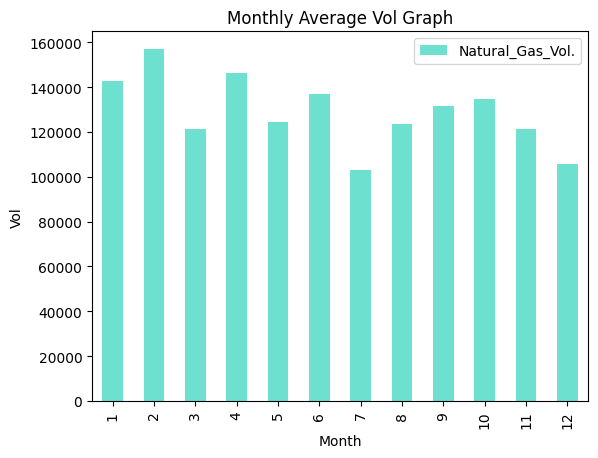

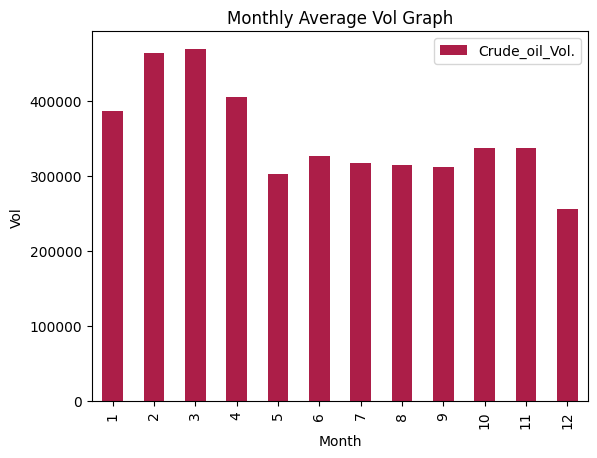

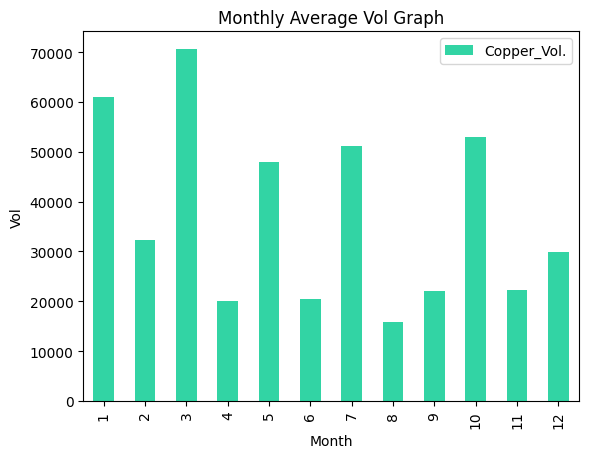

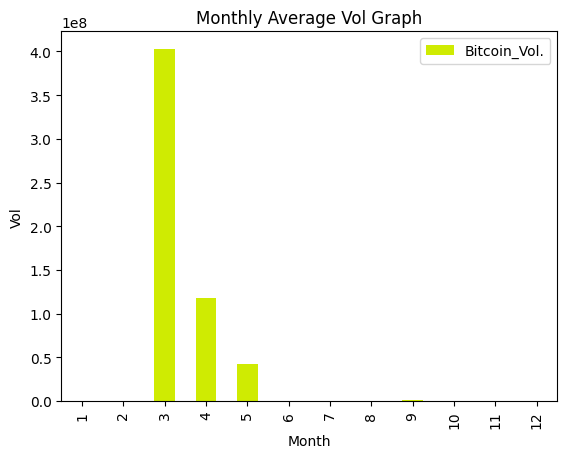

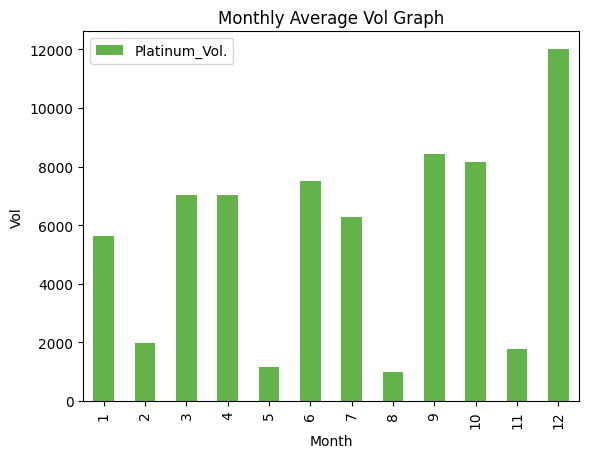

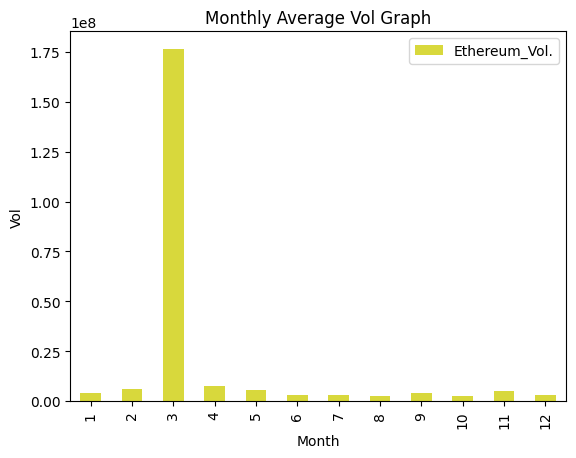

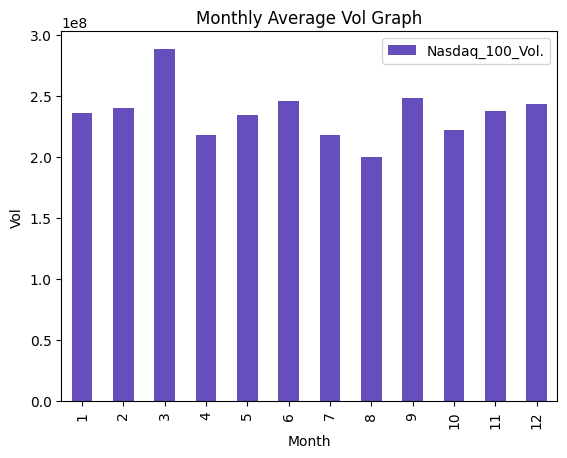

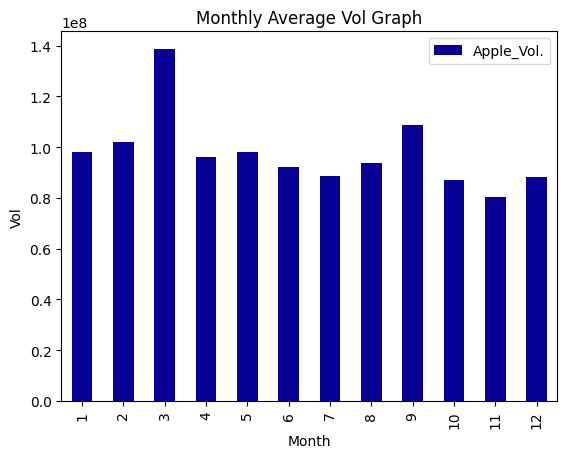

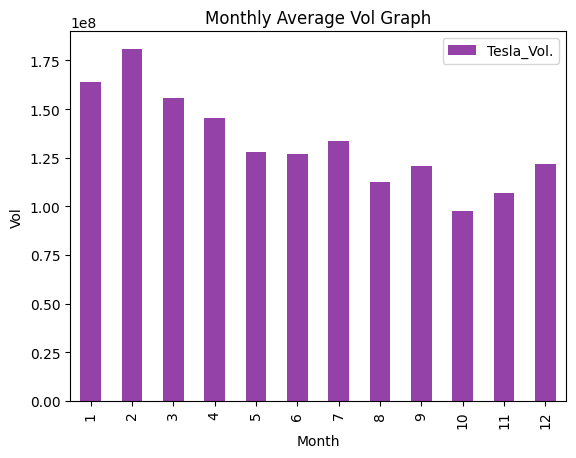

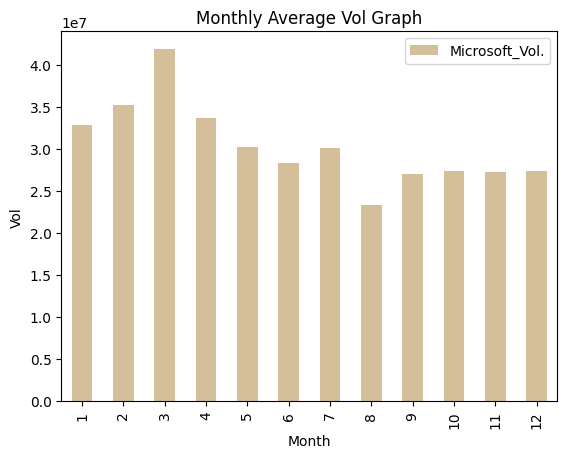

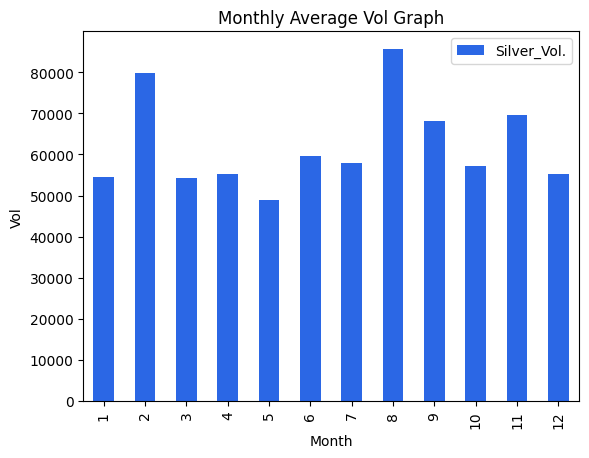

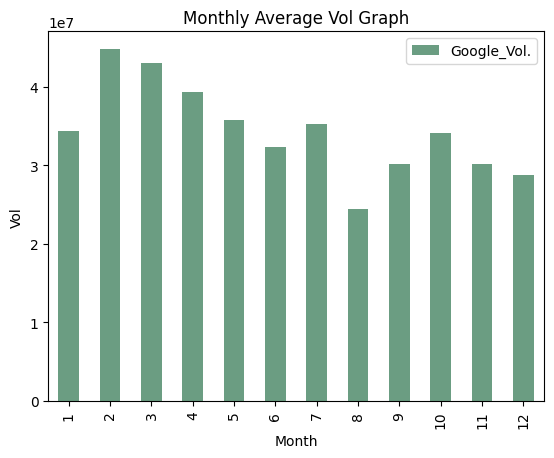

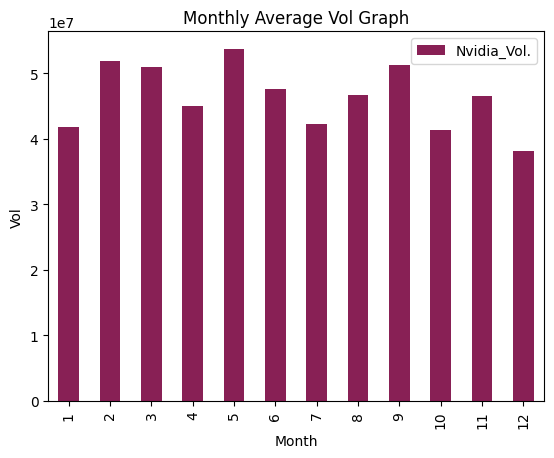

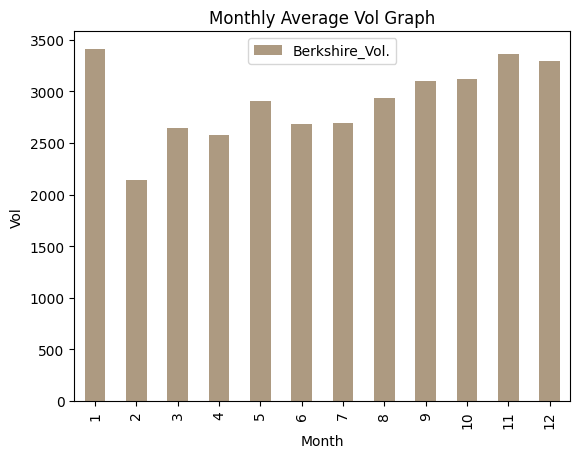

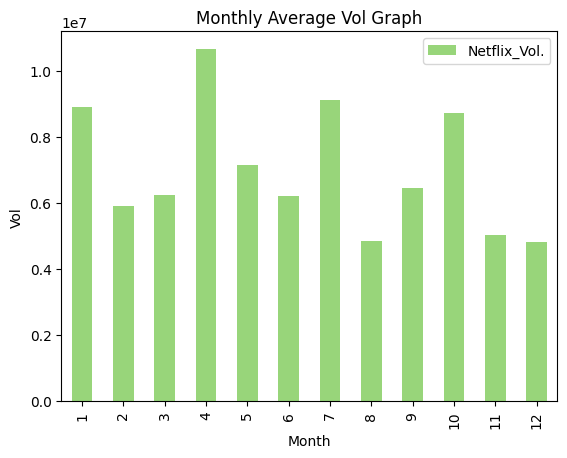

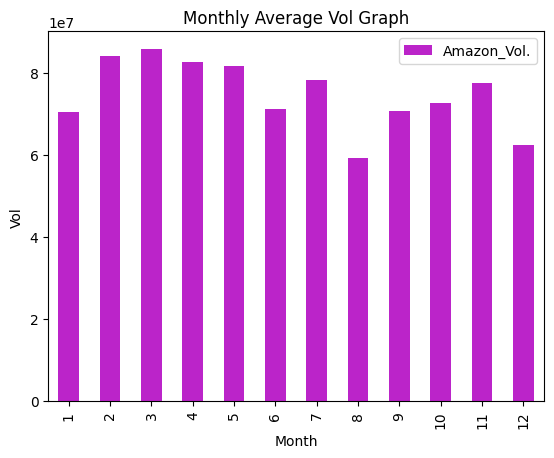

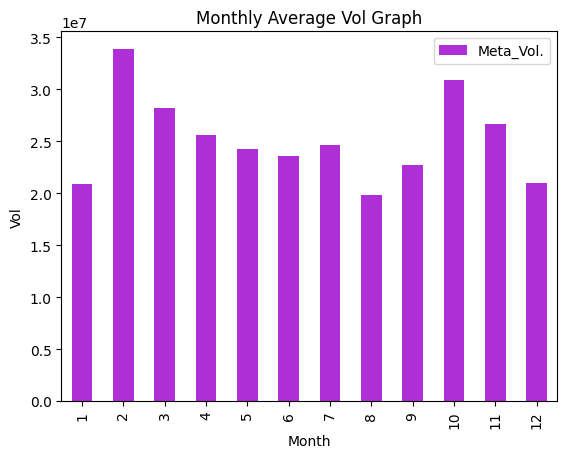

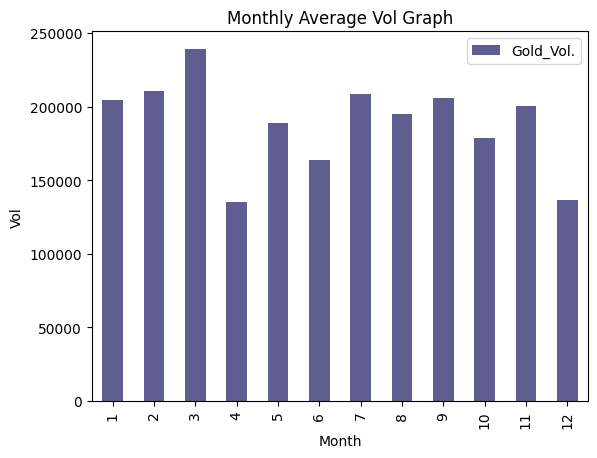

In [27]:
# Monthly Average Vol Graph
for col in col_vol:
    pivot_table_month_6 = pd.pivot_table(data_pre,index='Month', values=col, aggfunc='mean')
    pivot_table_month_6.plot(kind='bar', color=np.random.rand(3,))
    plt.xlabel('Month')
    plt.ylabel('Vol')
    plt.title('Monthly Average Vol Graph')
    plt.legend()
    plt.show()

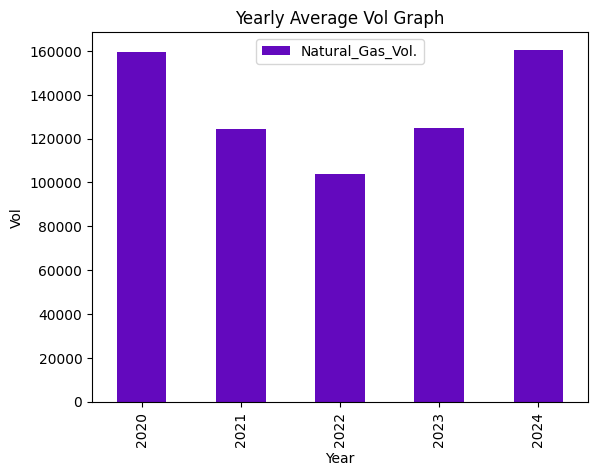

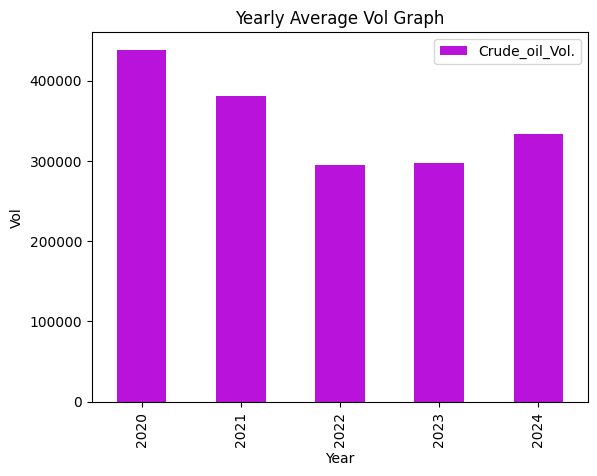

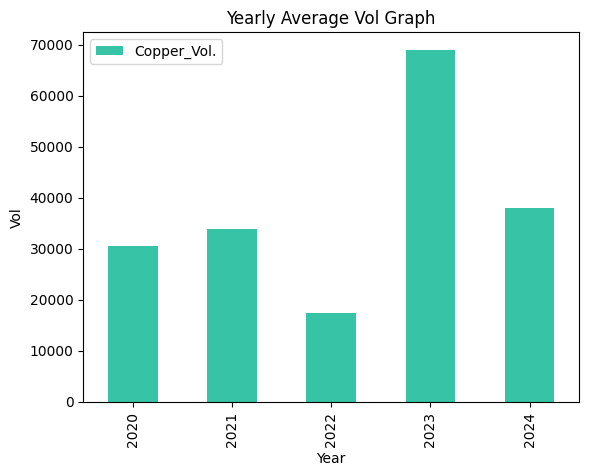

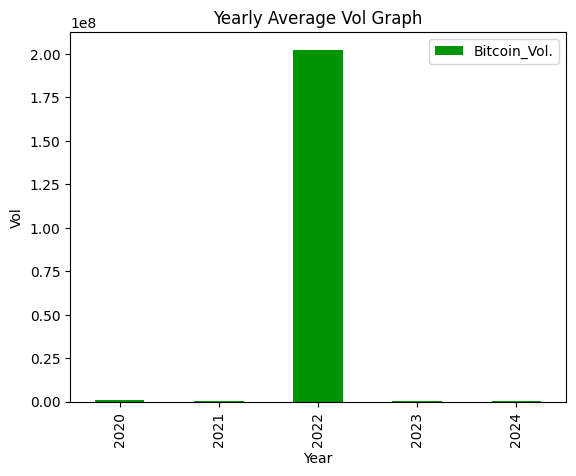

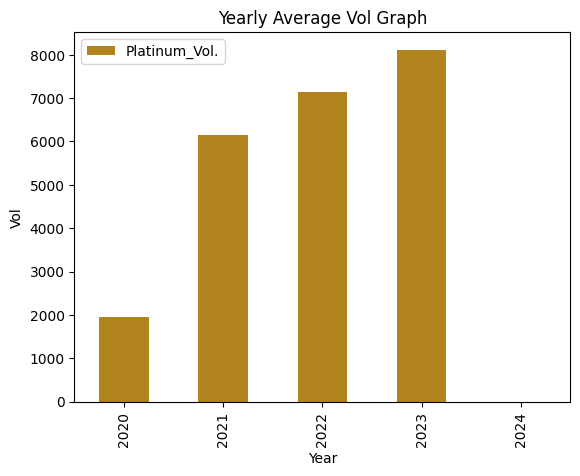

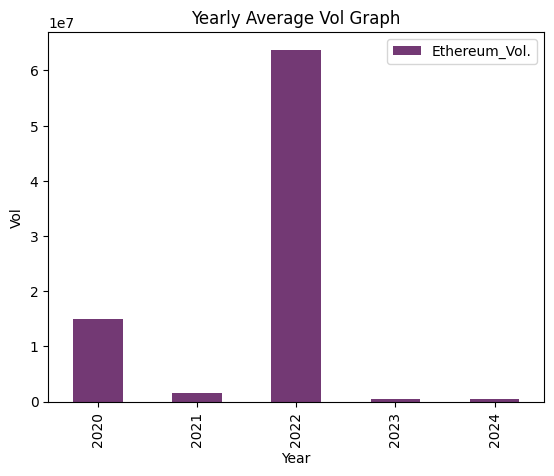

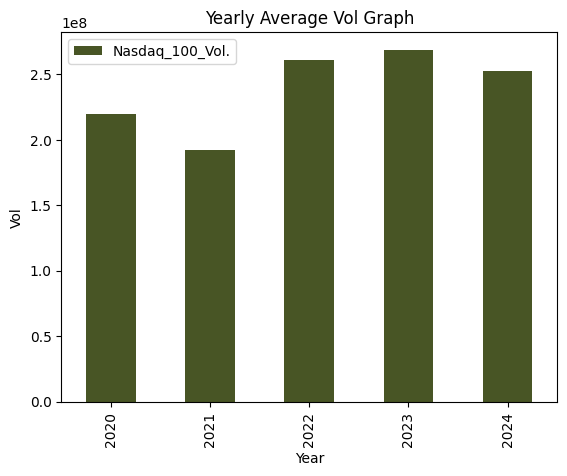

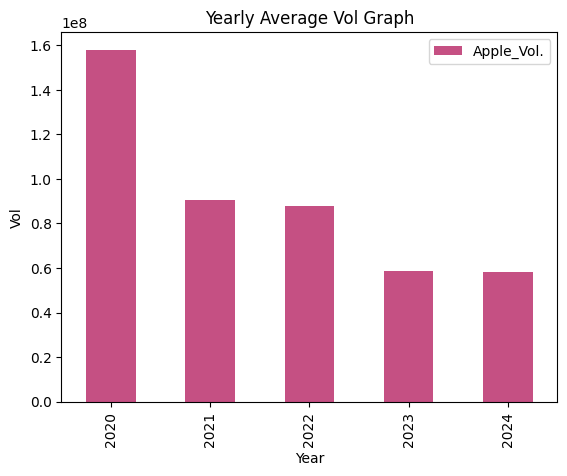

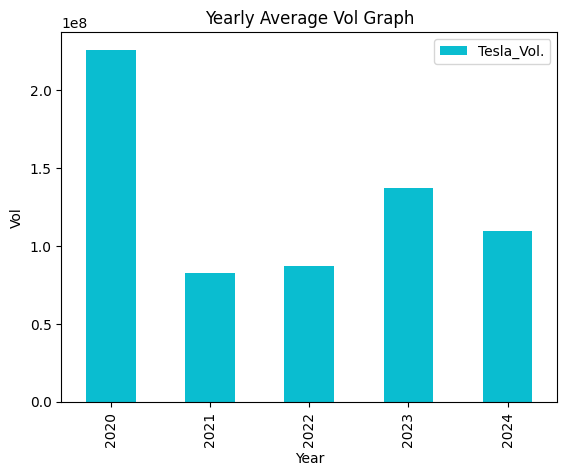

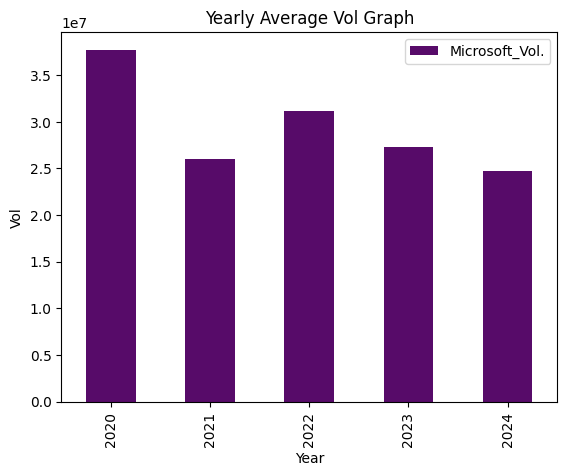

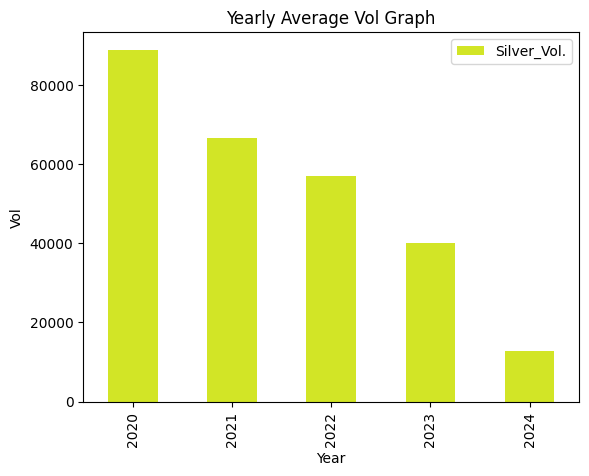

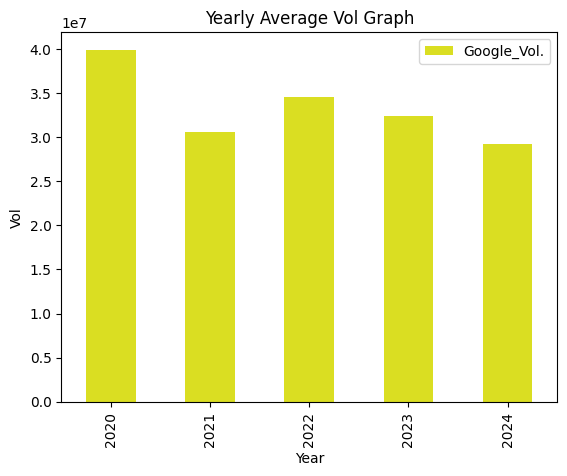

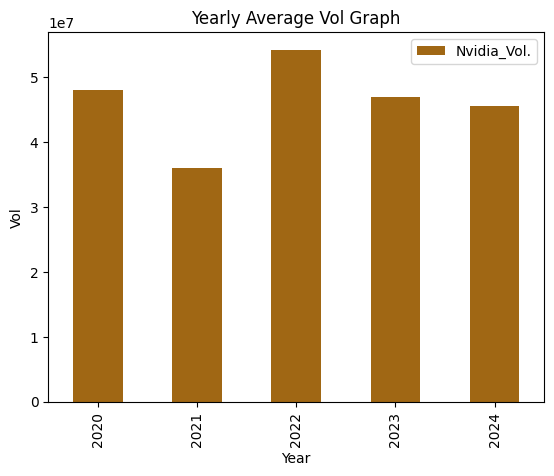

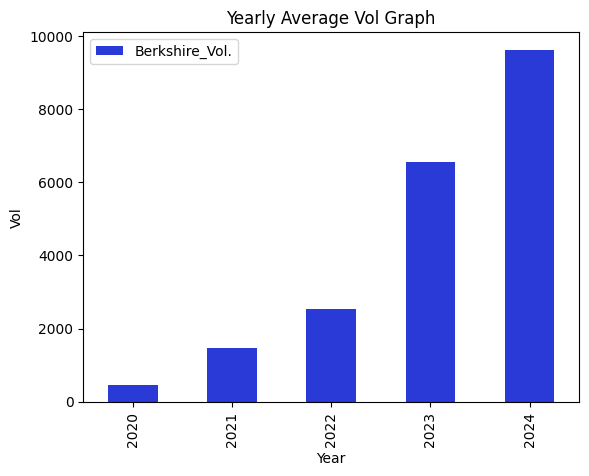

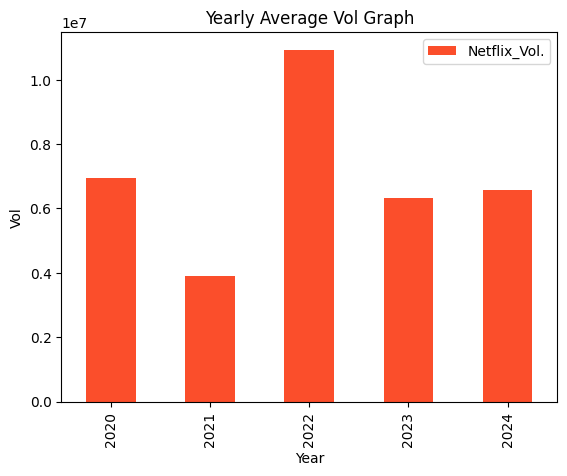

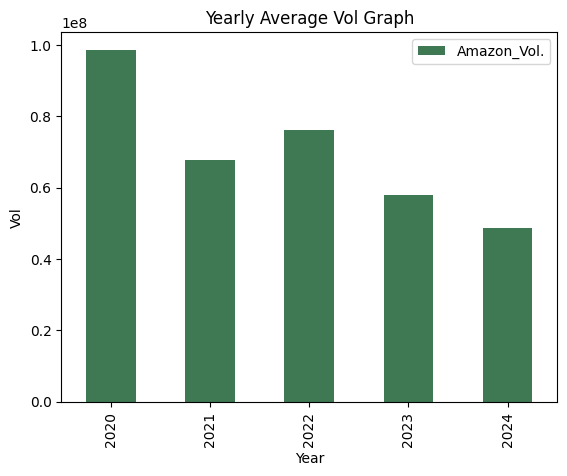

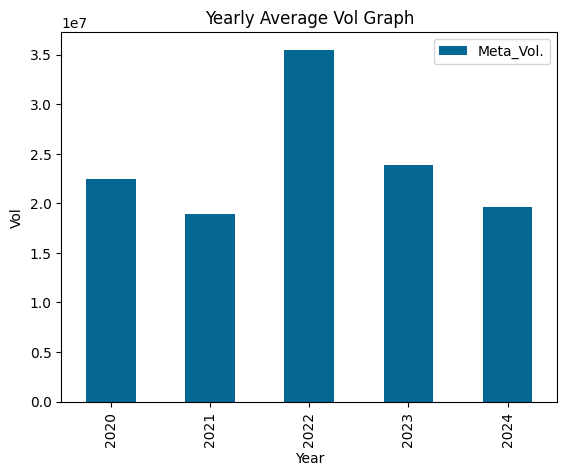

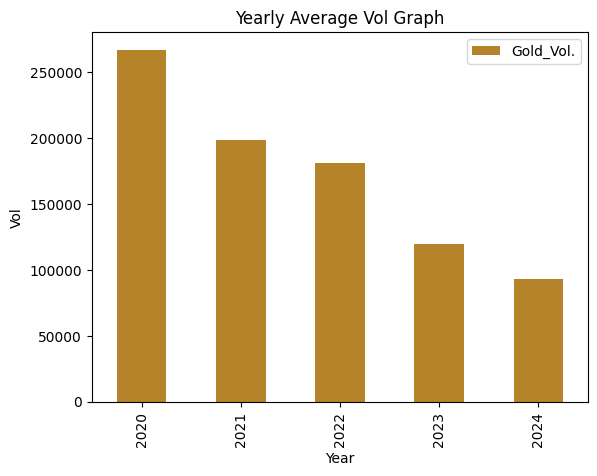

In [28]:
# Yearly Average Price Graph
for col in col_vol:
    pivot_table_year_6 = pd.pivot_table(data_pre,index='Year', values=col, aggfunc='mean')
    pivot_table_year_6.plot(kind='bar', color=np.random.rand(3,))
    plt.xlabel('Year')
    plt.ylabel('Vol')
    plt.title('Yearly Average Vol Graph')
    plt.legend()
    plt.show()